In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 18})

In [2]:
def linear_lstsq(X, F):
    A_t, _, _, _ = np.linalg.lstsq(X, F, rcond=-1)
    return A_t
    
def mean_squared_error(x, y):
    return np.mean(np.square(x - y))
    
def finite_diff(x0, x1, delta_t):
    return (x1 - x0) / delta_t

# Part 1

In [3]:
# read data
x0 = np.loadtxt('../data/linear_vectorfield_data_x0.txt', delimiter=' ')
x1 = np.loadtxt('../data/linear_vectorfield_data_x1.txt', delimiter=' ')

In [5]:
delta_t = 0.1
v = finite_diff(x0, x1, delta_t)
A_t = linear_lstsq(x0, v)

Text(0.5, 1.0, 'Vector field')

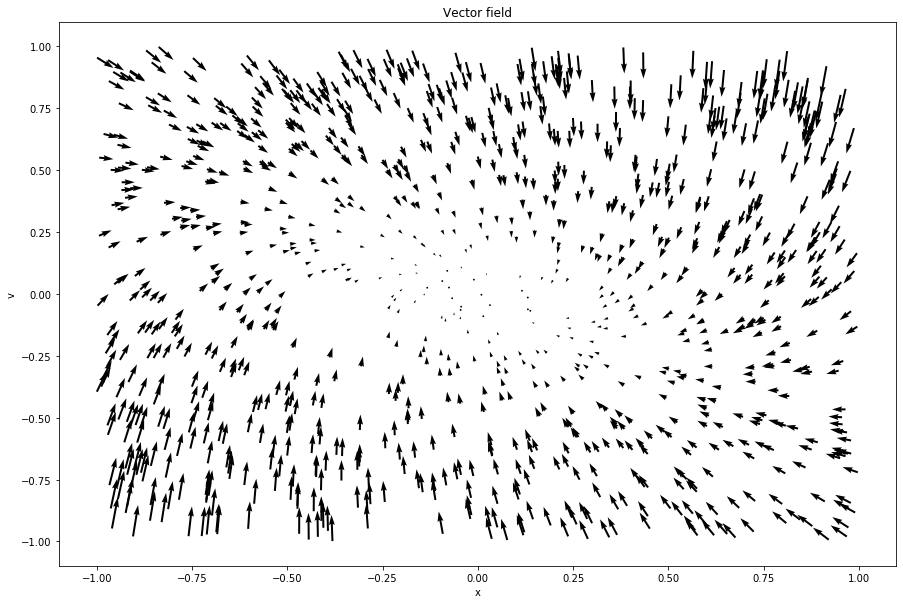

In [22]:
plt.figure(figsize=(15, 10))
plt.quiver(x0[:, 0], x0[:, 1], v[:, 0], v[:, 1])
plt.xlabel('x')
plt.ylabel('v')
plt.title("Vector field")

# Part 2

In [6]:
x_dot = np.dot(x0, A_t)
x1_hat = x0 + delta_t * x_dot
mse = mean_squared_error(x1, x1_hat)

In [7]:
mse

5.2660926663700736e-17

In [8]:
x_dot.shape

(1000, 2)

# Part 3

In [9]:
# prev = np.ones(shape=(x_dot.shape)) * 10
x = [10, 10]
T = 100
points = []
x_dot0 = x_dot[0, :]

for i in range(1, 1000):
    x_dot0 = np.dot(x, A_t)
    x = x + 0.1 * x_dot0
    points.append(x)
points = np.array(points)

In [11]:
[grid_x, grid_y] = np.meshgrid(np.arange(-10, 11), np.arange(-10, 11))

In [12]:
grid_final_x = np.zeros((grid_x.shape[0], grid_x.shape[0]))
grid_final_y = np.zeros((grid_x.shape[0], grid_x.shape[0]))
for i in range(grid_final_x.shape[0]):
    for j in range(grid_final_y.shape[0]):
        prev = [grid_x[i][j], grid_y[i][j]]
        for k in range(1000):
            x_dot_k = np.dot(prev, A_t)
            prev = prev + 0.1 * x_dot_k
        grid_final_x[i][j] = prev[0]
        grid_final_y[i][j] = prev[1]

Text(0.5, 1.0, 'Phase portrait and trajectory')

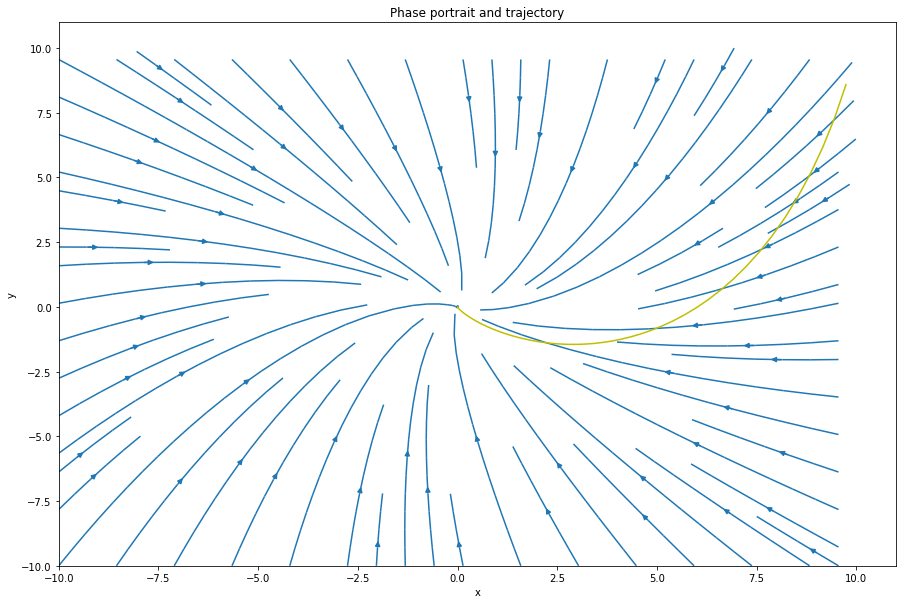

In [23]:
plt.figure(figsize=(15, 10))
plt.streamplot(grid_x, grid_y, -grid_final_x, -grid_final_y)
plt.plot(points[:, 0], points[:, 1], c='y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase portrait and trajectory')